In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import os

STATS_PATH = "../tries/history_statistics_glaiveai2k.json"

In [5]:
def load_data():
    with open(STATS_PATH, 'r') as f:
        stats = json.load(f)
    return stats

In [23]:
def plot_mean_top1_prob_distribution(stats):
    fig, axes = plt.subplots(1, 1, figsize=(15, 12))
    
    # extract mean_top1_prob data
    mean_top1_probs = [entry['mean_top1_prob'] for entry in stats]
    
    # 1. histogram
    axes.hist(mean_top1_probs, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes.set_xlabel('Mean Top-1 Probability')
    axes.set_ylabel('count')
    axes.set_title('Mean Top-1 Probability histogram')
    axes.grid(True, alpha=0.3)
    
    # show mean and std
    mean_val = np.mean(mean_top1_probs)
    std_val = np.std(mean_top1_probs)
    axes.axvline(mean_val, color='red', linestyle='--', label=f'mean: {mean_val:.3f}')
    axes.legend()
    
    # # 2. show density
    # axes[0, 1].hist(mean_top1_probs, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
    # axes[0, 1].set_xlabel('Mean Top-1 Probability')
    # axes[0, 1].set_ylabel('density')
    # axes[0, 1].set_title('Mean Top-1 Probability density distribution')
    # axes[0, 1].grid(True, alpha=0.3)
    
    # # show gaussian kde
    # from scipy.stats import gaussian_kde
    # kde = gaussian_kde(mean_top1_probs)
    # x_range = np.linspace(min(mean_top1_probs), max(mean_top1_probs), 200)
    # axes[0, 1].plot(x_range, kde(x_range), 'r-', linewidth=2, label='gaussian kde')
    # axes[0, 1].legend()
    
    # # 3. boxplot
    # axes[1, 0].boxplot(mean_top1_probs, patch_artist=True, 
    #                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
    # axes[1, 0].set_ylabel('Mean Top-1 Probability')
    # axes[1, 0].set_title('Mean Top-1 Probability boxplot')
    # axes[1, 0].grid(True, alpha=0.3)
    
    # # show statistics
    # q25, q50, q75 = np.percentile(mean_top1_probs, [25, 50, 75])
    # axes[1, 0].text(0.5, q25, f'Q1: {q25:.3f}', ha='center', va='bottom')
    # axes[1, 0].text(0.5, q50, f'Q2: {q50:.3f}', ha='center', va='bottom')
    # axes[1, 0].text(0.5, q75, f'Q3: {q75:.3f}', ha='center', va='bottom')
    
    # # 4. violinplot
    # axes[1, 1].violinplot(mean_top1_probs, points=100)
    # axes[1, 1].set_ylabel('Mean Top-1 Probability')
    # axes[1, 1].set_title('Mean Top-1 Probability violinplot')
    # axes[1, 1].grid(True, alpha=0.3)
    
    plt.rcParams['font.size'] = 25
    plt.tight_layout()
    plt.show()

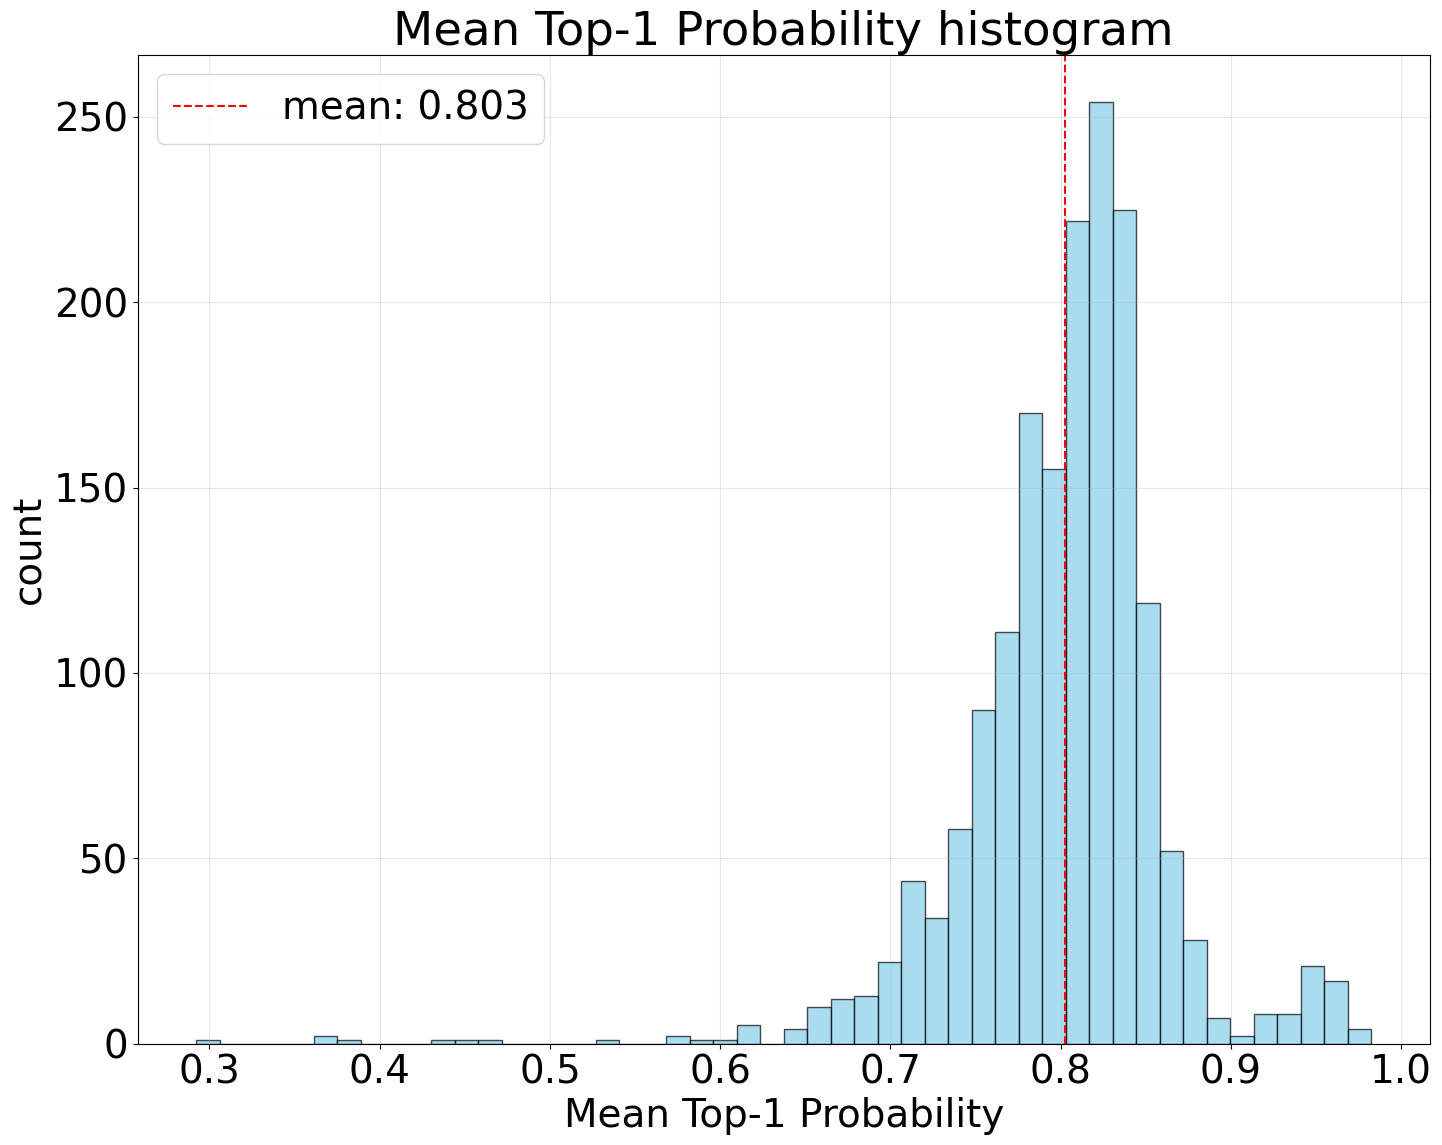

In [24]:
stats = load_data()
plot_mean_top1_prob_distribution(stats)

In [12]:
def plot_mean_top1_prob_correlations(stats):
    """plot the correlations between mean_top1_prob and other metrics"""
    # create dataframe
    df = pd.DataFrame(stats)
    
    # select correlation metrics
    correlation_columns = ['mean_top1_prob', 'mean_top1_prob_masked', 'mean_accepted_ratio', 
                          'intervention_rate', 'mean_rank_shift', 'total_steps']
    
    # calculate correlation matrix
    corr_matrix = df[correlation_columns].corr()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. correlation heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f', ax=axes[0, 0])
    axes[0, 0].set_title('Mean Top-1 Probability correlation heatmap')
    
    # 2. scatter plot between intervention_rate and mean_top1_prob
    axes[0, 1].scatter(df['intervention_rate'], df['mean_top1_prob'], 
                      alpha=0.6, color='blue')
    axes[0, 1].set_xlabel('intervention rate')
    axes[0, 1].set_ylabel('Mean Top-1 Probability')
    axes[0, 1].set_title('Mean Top-1 Probability vs intervention rate')
    axes[0, 1].grid(True, alpha=0.3)
    
    # show trend line
    z = np.polyfit(df['intervention_rate'], df['mean_top1_prob'], 1)
    p = np.poly1d(z)
    axes[0, 1].plot(df['intervention_rate'], p(df['intervention_rate']), 
                   "r--", alpha=0.8, linewidth=2)
    
    # 3. 与接受率的散点图
    axes[1, 0].scatter(df['mean_accepted_ratio'], df['mean_top1_prob'], 
                      alpha=0.6, color='green')
    axes[1, 0].set_xlabel('mean accepted ratio')
    axes[1, 0].set_ylabel('Mean Top-1 Probability')
    axes[1, 0].set_title('Mean Top-1 Probability vs mean accepted ratio')
    axes[1, 0].grid(True, alpha=0.3)
    
    # show trend line
    z = np.polyfit(df['mean_accepted_ratio'], df['mean_top1_prob'], 1)
    p = np.poly1d(z)
    axes[1, 0].plot(df['mean_accepted_ratio'], p(df['mean_accepted_ratio']), 
                   "r--", alpha=0.8, linewidth=2)
    
    # 4. scatter plot between mean_rank_shift and mean_top1_prob
    axes[1, 1].scatter(df['mean_rank_shift'], df['mean_top1_prob'], 
                      alpha=0.6, color='purple')
    axes[1, 1].set_xlabel('mean rank shift')
    axes[1, 1].set_ylabel('Mean Top-1 Probability')
    axes[1, 1].set_title('Mean Top-1 Probability vs mean rank shift')
    axes[1, 1].grid(True, alpha=0.3)
    
    # show trend line
    z = np.polyfit(df['mean_rank_shift'], df['mean_top1_prob'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(df['mean_rank_shift'], p(df['mean_rank_shift']), 
                   "r--", alpha=0.8, linewidth=2)
    
    plt.tight_layout()
    plt.show()

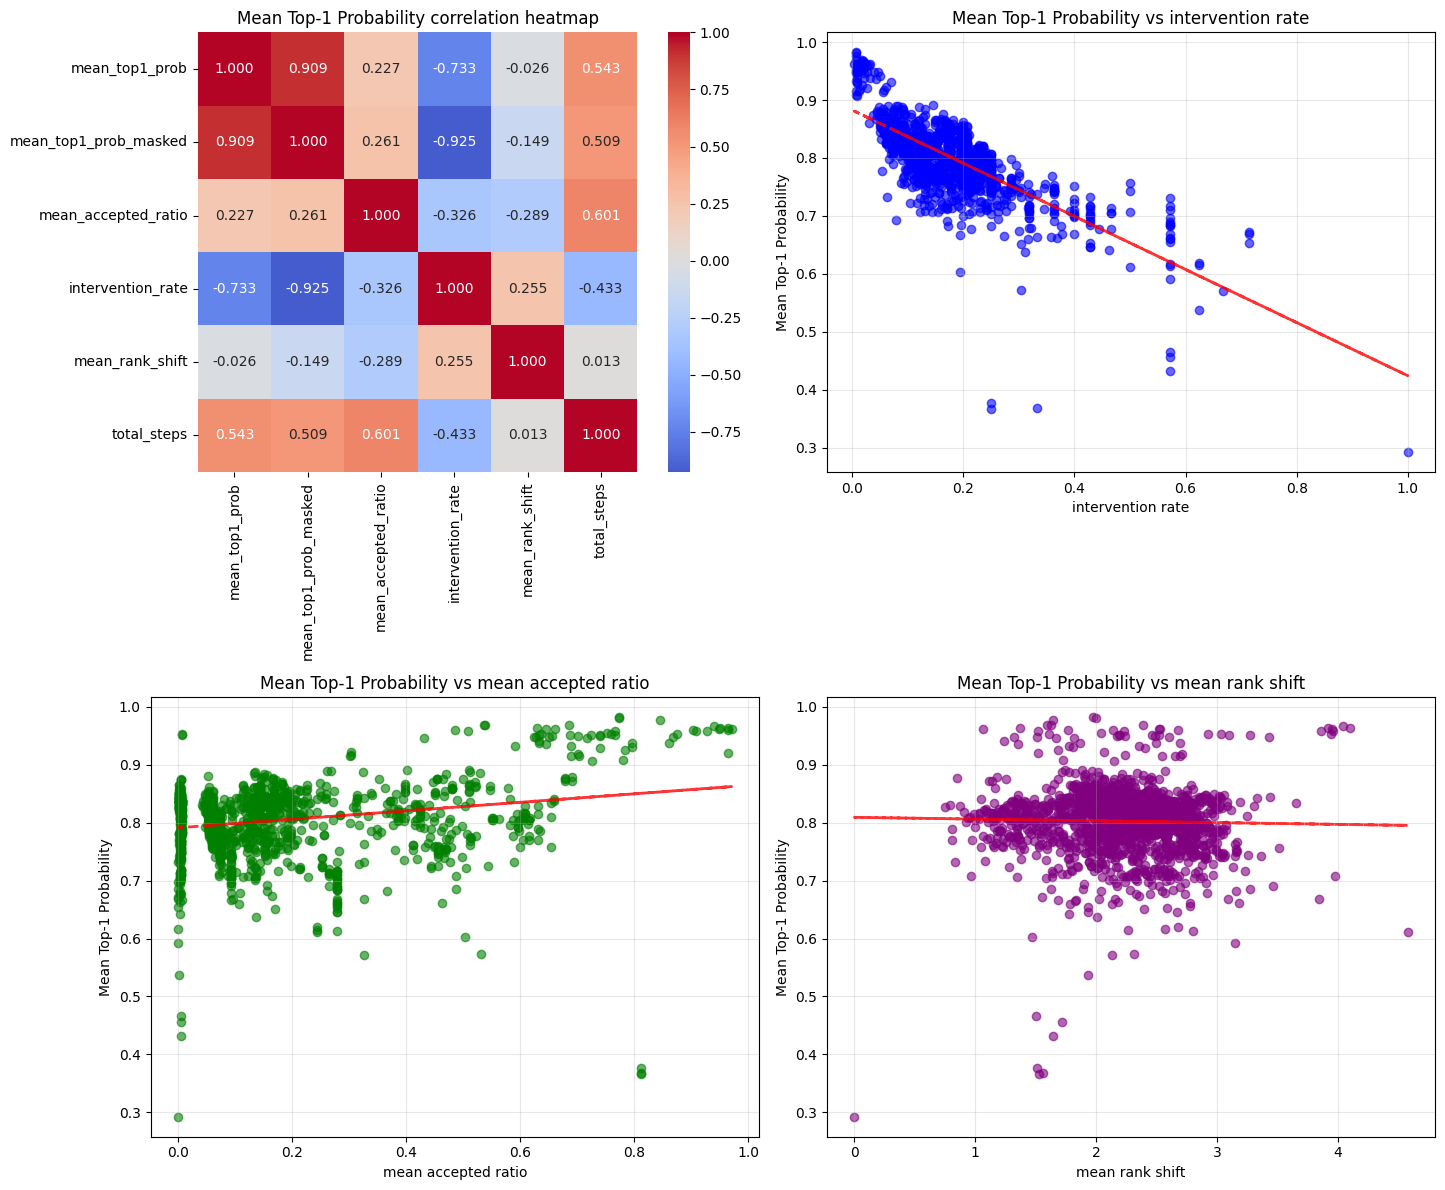

In [13]:
plot_mean_top1_prob_correlations(stats)

In [20]:
def plot_probability_change_distribution(stats):
    """Plot probability change distribution"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Extract data
    before_mask = [entry['mean_top1_prob'] for entry in stats]
    after_mask = [entry['mean_top1_prob_masked'] for entry in stats]
    prob_change = np.array(before_mask) - np.array(after_mask)
    prob_change_ratio = prob_change / np.array(before_mask) * 100  # Percentage change
    
    # 1. Probability change histogram
    axes[0, 0].hist(prob_change, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 0].set_xlabel('Probability Change (Before - After)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Probability Change Distribution Before/After Mask')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add mean line
    mean_change = np.mean(prob_change)
    axes[0, 0].axvline(mean_change, color='red', linestyle='--', 
                      label=f'Mean Change: {mean_change:.4f}')
    axes[0, 0].legend()
    
    # 2. Probability change percentage distribution
    axes[0, 1].hist(prob_change_ratio, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, 1].set_xlabel('Probability Change Percentage (%)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Probability Change Percentage Distribution')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Add mean line
    mean_change_ratio = np.mean(prob_change_ratio)
    axes[0, 1].axvline(mean_change_ratio, color='red', linestyle='--', 
                      label=f'Mean Change: {mean_change_ratio:.2f}%')
    axes[0, 1].legend()
    
    # 3. Before vs After scatter plot
    axes[1, 0].scatter(before_mask, after_mask, alpha=0.6, color='green')
    axes[1, 0].set_xlabel('Top-1 Probability Before Mask')
    axes[1, 0].set_ylabel('Top-1 Probability After Mask')
    axes[1, 0].set_title('Probability Comparison Before/After Mask')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add diagonal line (y=x)
    min_val = min(min(before_mask), min(after_mask))
    max_val = max(max(before_mask), max(after_mask))
    axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='y=x')
    axes[1, 0].legend()
    
    # 4. Probability change boxplot
    axes[1, 1].boxplot([prob_change_ratio], 
                      labels=['Percentage Change (%)'],
                      patch_artist=True,
                      boxprops=dict(facecolor='lightyellow', alpha=0.7))
    axes[1, 1].set_ylabel('Change Value')
    axes[1, 1].set_title('Probability Change Statistics')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3175712/3592479580.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([prob_change_ratio],


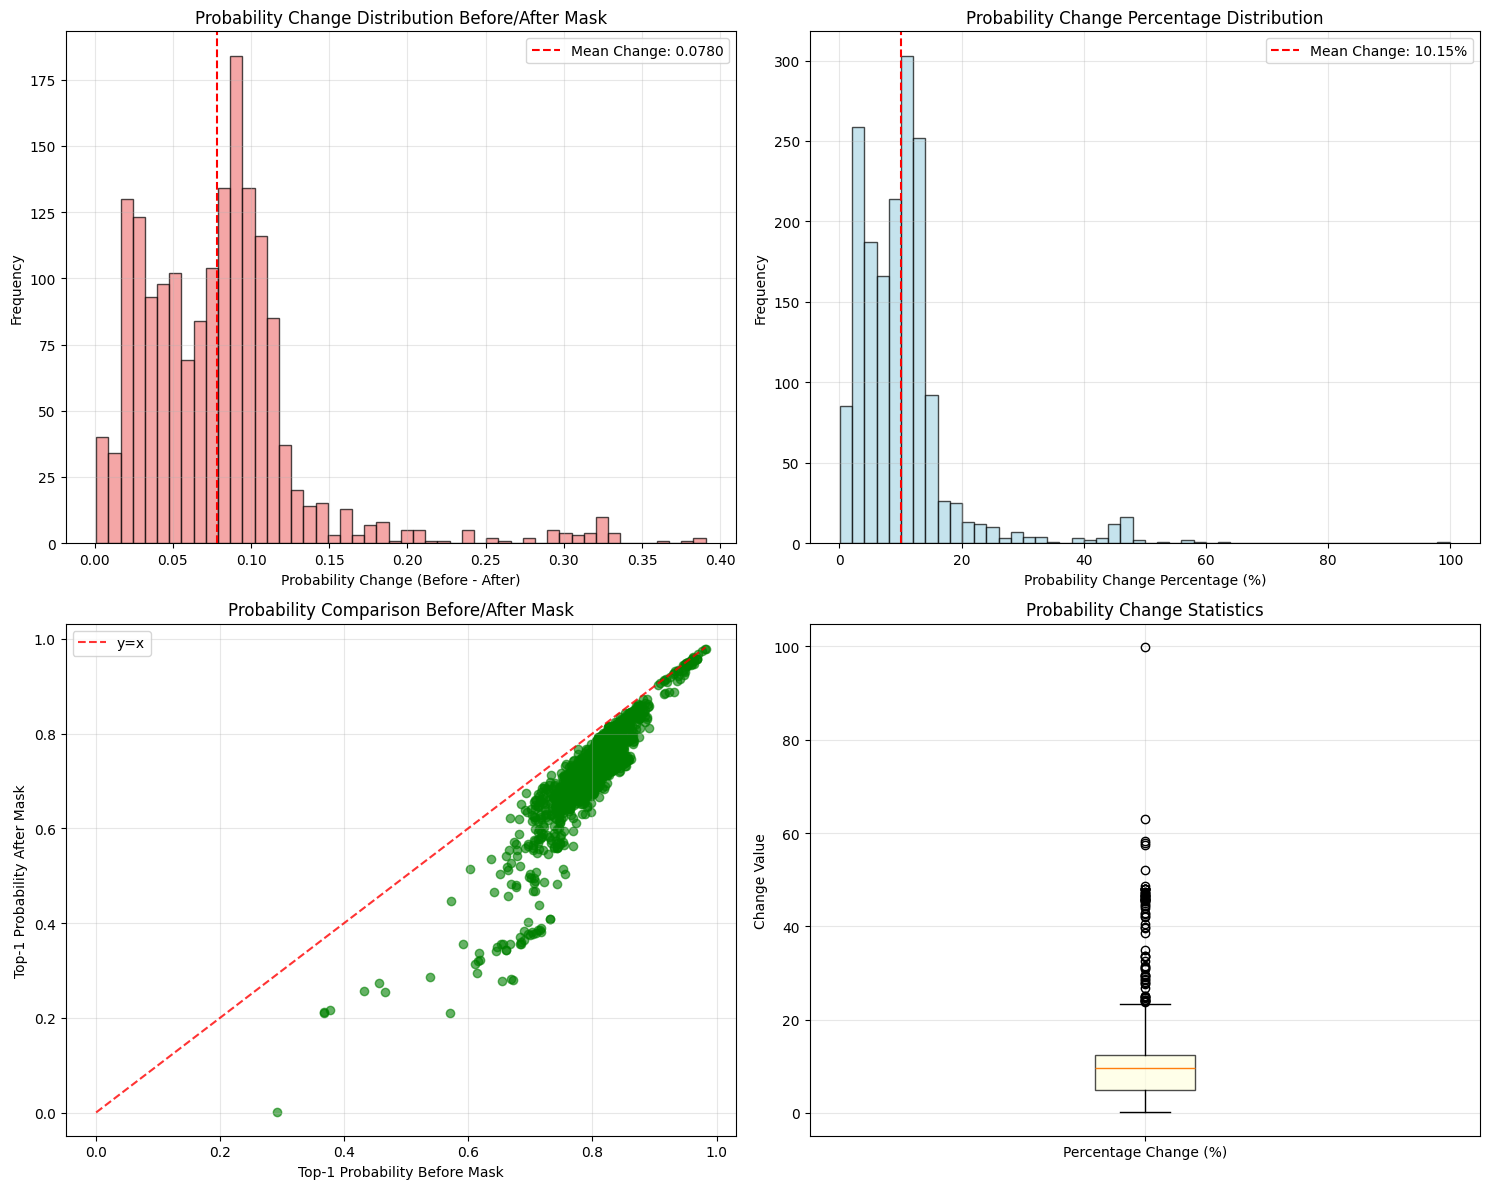

In [21]:
plot_probability_change_distribution(stats)

In [22]:
def plot_probability_change_analysis(stats):
    """Plot probability change analysis"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Extract data
    before_mask = [entry['mean_top1_prob'] for entry in stats]
    after_mask = [entry['mean_top1_prob_masked'] for entry in stats]
    prob_change = np.array(before_mask) - np.array(after_mask)
    prob_change_ratio = prob_change / np.array(before_mask) * 100
    
    # 1. Cumulative distribution function - probability change
    sorted_changes = np.sort(prob_change)
    cumulative_prob = np.arange(1, len(sorted_changes) + 1) / len(sorted_changes)
    
    axes[0, 0].plot(sorted_changes, cumulative_prob, 'b-', linewidth=2)
    axes[0, 0].set_xlabel('Probability Change')
    axes[0, 0].set_ylabel('Cumulative Probability')
    axes[0, 0].set_title('Probability Change Cumulative Distribution Function')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add percentile lines
    for percentile in [25, 50, 75, 90, 95]:
        value = np.percentile(prob_change, percentile)
        axes[0, 0].axvline(value, color='red', linestyle='--', alpha=0.7)
        axes[0, 0].text(value, 0.5, f'{percentile}%', rotation=90, va='center')
    
    # 2. Probability change vs original probability
    axes[0, 1].scatter(before_mask, prob_change, alpha=0.6, color='purple')
    axes[0, 1].set_xlabel('Top-1 Probability Before Mask')
    axes[0, 1].set_ylabel('Probability Change')
    axes[0, 1].set_title('Probability Change vs Original Probability')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(before_mask, prob_change, 1)
    p = np.poly1d(z)
    axes[0, 1].plot(before_mask, p(before_mask), "r--", alpha=0.8, linewidth=2)
    
    # 3. Probability change vs intervention rate
    intervention_rates = [entry['intervention_rate'] for entry in stats]
    axes[1, 0].scatter(intervention_rates, prob_change, alpha=0.6, color='orange')
    axes[1, 0].set_xlabel('Intervention Rate')
    axes[1, 0].set_ylabel('Probability Change')
    axes[1, 0].set_title('Probability Change vs Intervention Rate')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(intervention_rates, prob_change, 1)
    p = np.poly1d(z)
    axes[1, 0].plot(intervention_rates, p(intervention_rates), "r--", alpha=0.8, linewidth=2)
    
    # 4. Probability change vs acceptance rate
    accepted_ratios = [entry['mean_accepted_ratio'] for entry in stats]
    axes[1, 1].scatter(accepted_ratios, prob_change, alpha=0.6, color='brown')
    axes[1, 1].set_xlabel('Mean Acceptance Ratio')
    axes[1, 1].set_ylabel('Probability Change')
    axes[1, 1].set_title('Probability Change vs Mean Acceptance Ratio')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(accepted_ratios, prob_change, 1)
    p = np.poly1d(z)
    axes[1, 1].plot(accepted_ratios, p(accepted_ratios), "r--", alpha=0.8, linewidth=2)
    
    plt.tight_layout()
    plt.savefig('mask_probability_change_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

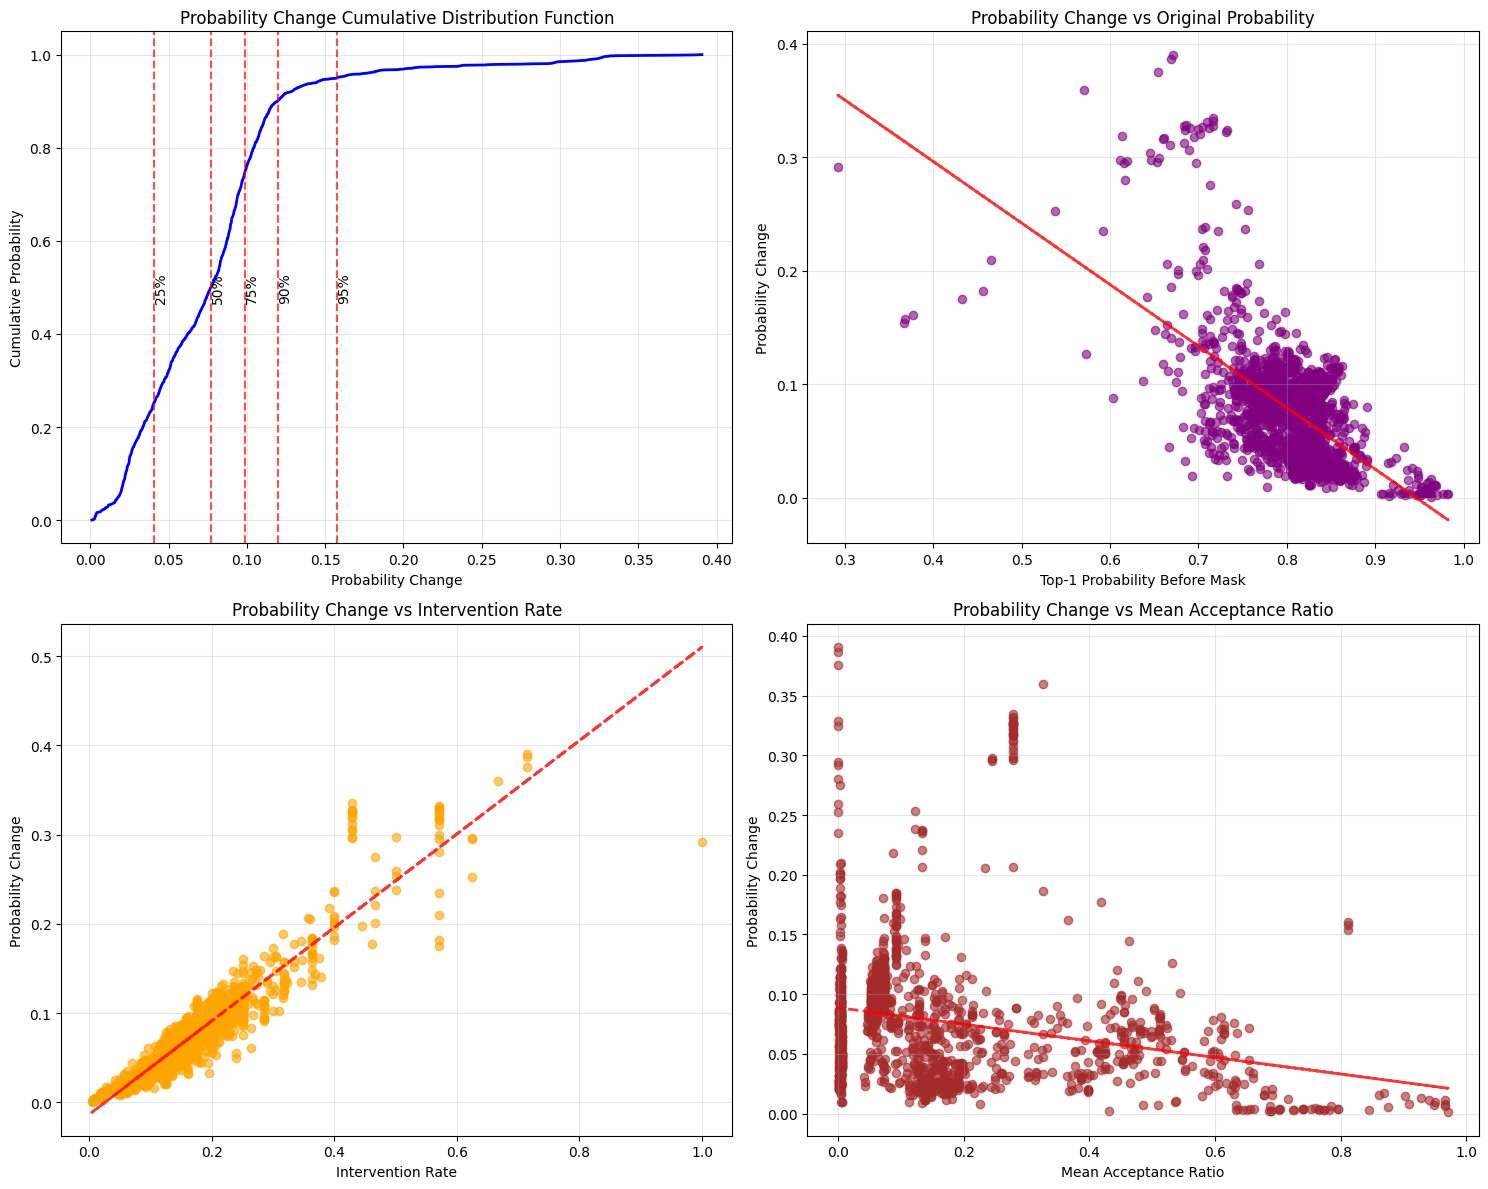

In [23]:
plot_probability_change_analysis(stats)

In [44]:
def plot_probability_change_statistics(stats):
    """Plot probability change statistics"""
    fig, axes = plt.subplots(1, 1, figsize=(15, 12))
    
    # Extract data
    before_mask = [entry['mean_top1_prob'] for entry in stats]
    after_mask = [entry['mean_top1_prob_masked'] for entry in stats]
    prob_change = np.array(before_mask) - np.array(after_mask)
    prob_change_ratio = prob_change / np.array(before_mask) * 100
    
    # 1. Before vs After histogram comparison
    axes.hist(before_mask, bins=50, alpha=0.5, label='Before Mask', color='blue', density=True)
    axes.hist(after_mask, bins=50, alpha=0.5, label='After Mask', color='red', density=True)
    axes.set_xlabel('Top-1 Probability')
    axes.set_ylabel('Density')
    axes.set_title('Probability Density Comparison Before/After Mask')
    axes.legend()
    axes.grid(True, alpha=0.3)
    
    plt.rcParams['font.size'] = 32
    plt.tight_layout()
    plt.show()

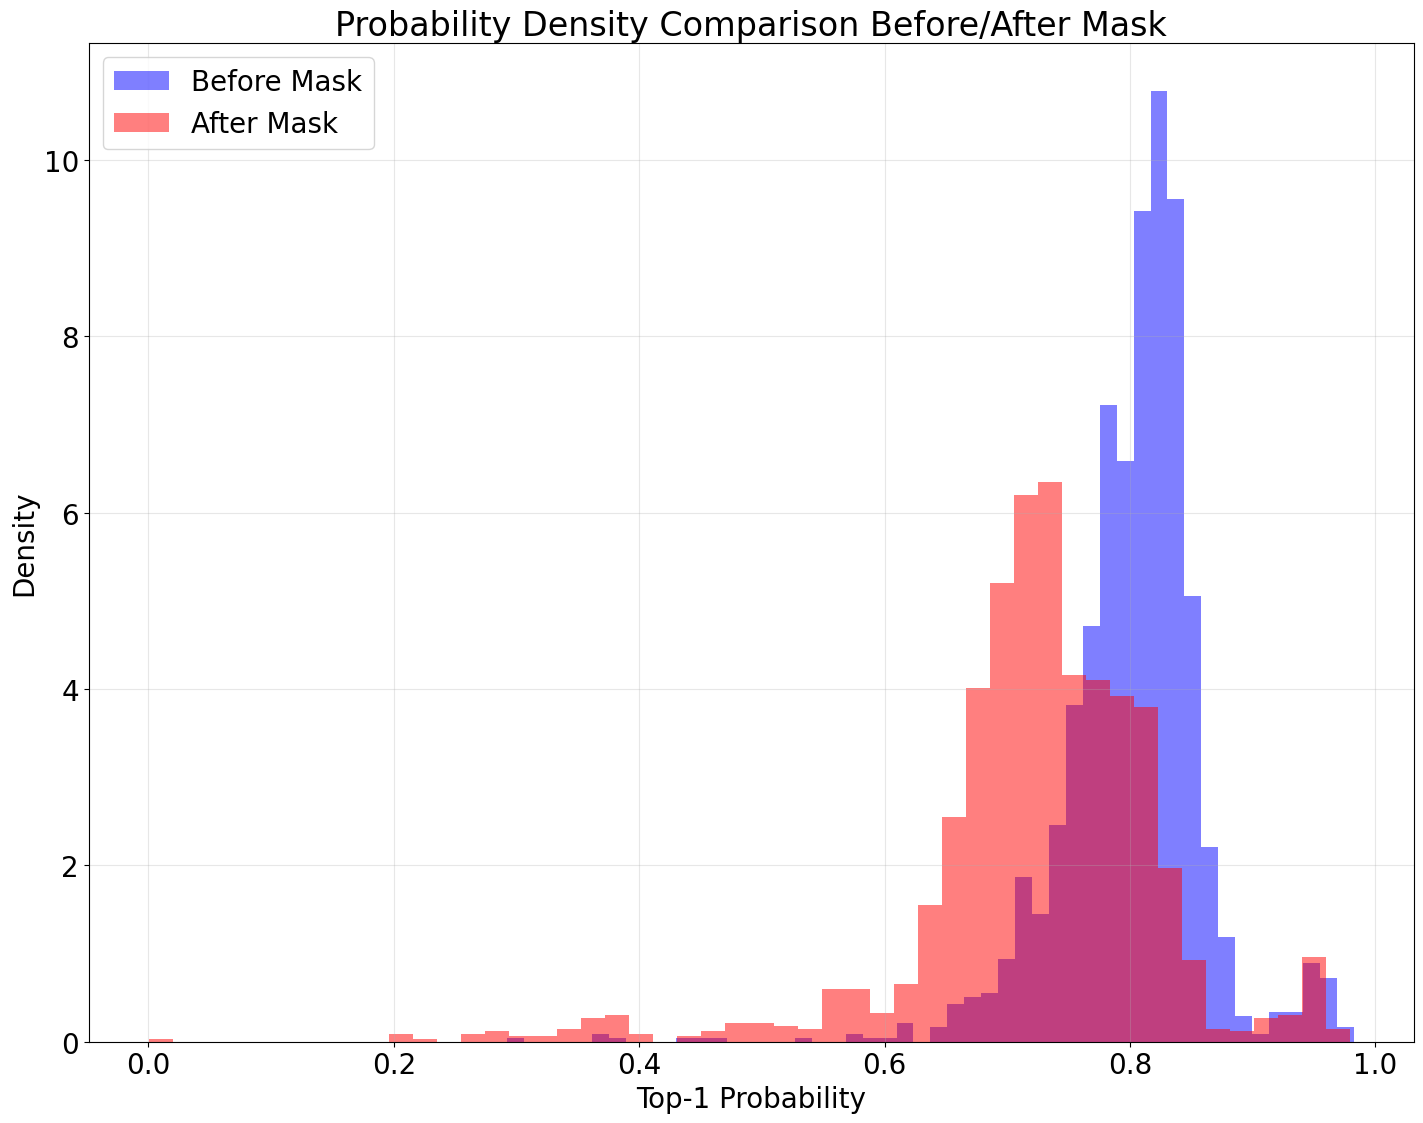

In [45]:
plot_probability_change_statistics(stats)

/tmp/ipykernel_3329353/447848901.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(binned_data, labels=bin_labels)


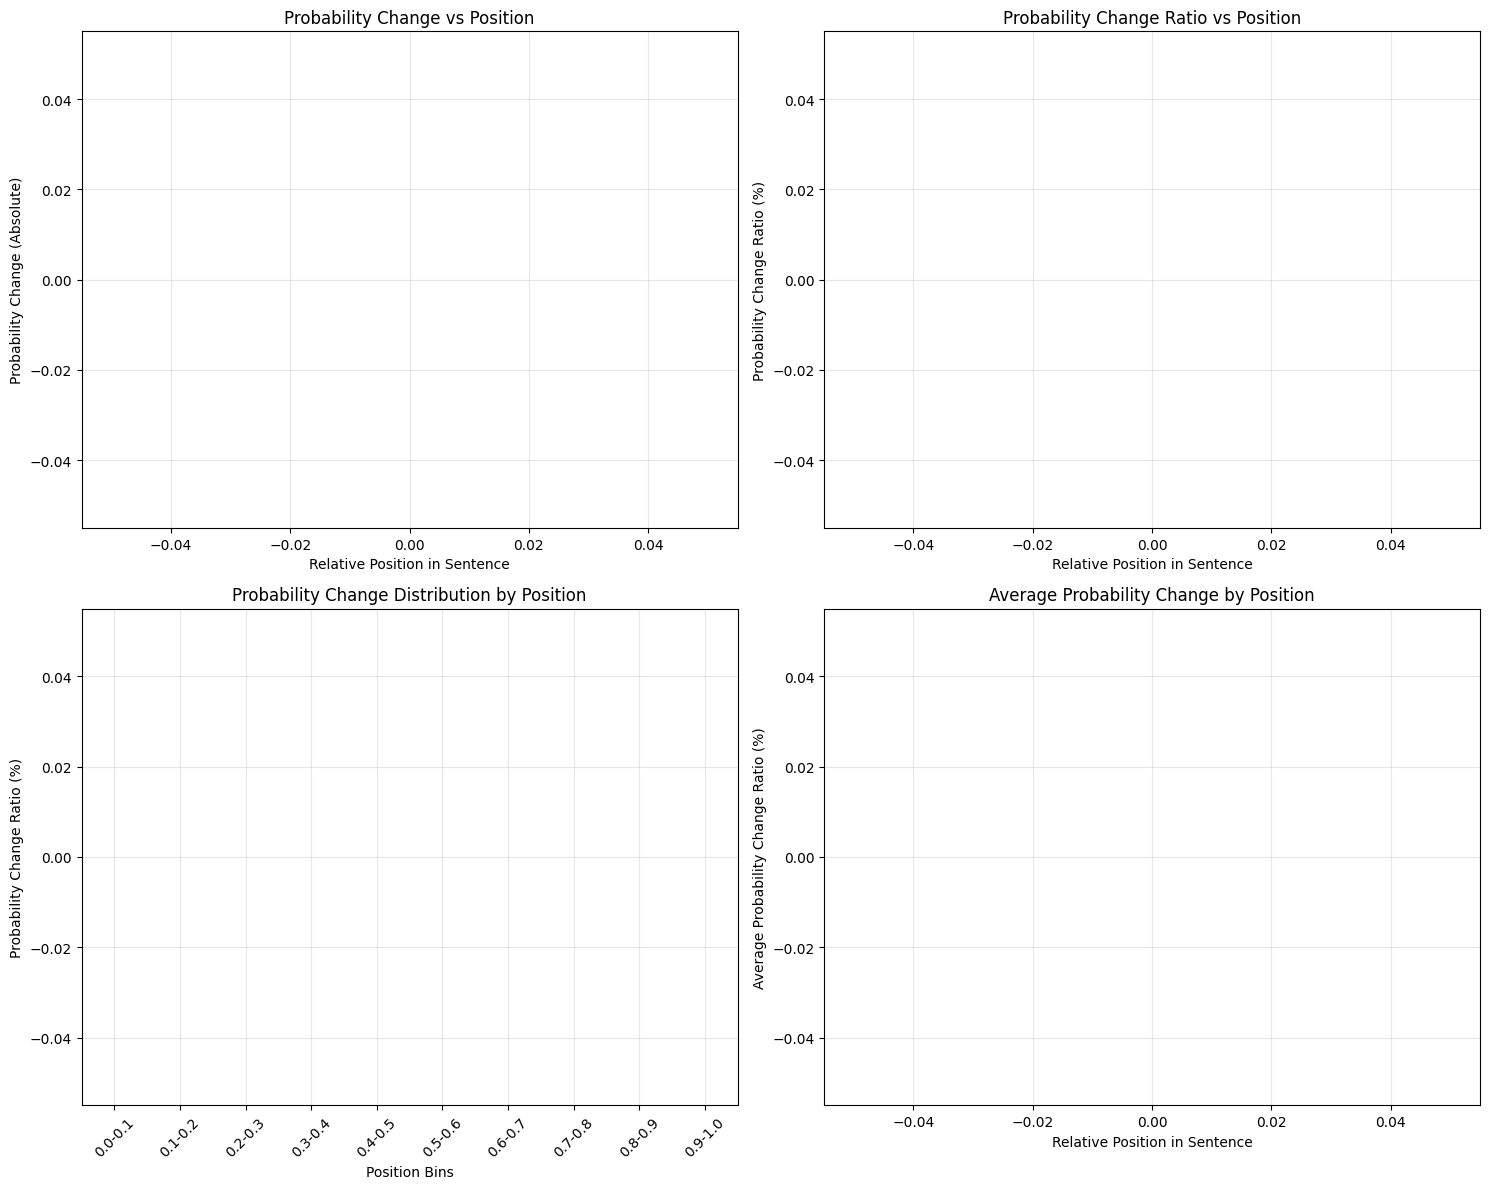

Total tokens analyzed: 0


ValueError: zero-size array to reduction operation minimum which has no identity

In [10]:
def analyze_probability_change_by_position(stats):
    """Analyze probability change by relative position in sentence"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Extract data
    positions = []
    prob_changes = []
    prob_change_ratios = []
    
    for entry in stats:
        if 'position_info' in entry:
            for pos_info in entry['position_info']:
                positions.append(pos_info['relative_position'])
                prob_change = pos_info['before_prob'] - pos_info['after_prob']
                prob_changes.append(prob_change)
                prob_change_ratio = (prob_change / pos_info['before_prob']) * 100 if pos_info['before_prob'] > 0 else 0
                prob_change_ratios.append(prob_change_ratio)
    
    positions = np.array(positions)
    prob_changes = np.array(prob_changes)
    prob_change_ratios = np.array(prob_change_ratios)
    
    # 1. Scatter plot: Position vs Probability Change
    axes[0, 0].scatter(positions, prob_changes, alpha=0.6, s=20)
    axes[0, 0].set_xlabel('Relative Position in Sentence')
    axes[0, 0].set_ylabel('Probability Change (Absolute)')
    axes[0, 0].set_title('Probability Change vs Position')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add trend line
    if len(positions) > 1:
        z = np.polyfit(positions, prob_changes, 1)
        p = np.poly1d(z)
        axes[0, 0].plot(positions, p(positions), "r--", alpha=0.8, linewidth=2)
    
    # 2. Scatter plot: Position vs Probability Change Ratio
    axes[0, 1].scatter(positions, prob_change_ratios, alpha=0.6, s=20)
    axes[0, 1].set_xlabel('Relative Position in Sentence')
    axes[0, 1].set_ylabel('Probability Change Ratio (%)')
    axes[0, 1].set_title('Probability Change Ratio vs Position')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Add trend line
    if len(positions) > 1:
        z = np.polyfit(positions, prob_change_ratios, 1)
        p = np.poly1d(z)
        axes[0, 1].plot(positions, p(positions), "r--", alpha=0.8, linewidth=2)
    
    # 3. Box plot by position bins
    position_bins = np.linspace(0, 1, 11)  # 10 bins from 0 to 1
    bin_labels = [f'{position_bins[i]:.1f}-{position_bins[i+1]:.1f}' for i in range(len(position_bins)-1)]
    
    binned_data = []
    for i in range(len(position_bins)-1):
        mask = (positions >= position_bins[i]) & (positions < position_bins[i+1])
        if np.any(mask):
            binned_data.append(prob_change_ratios[mask])
        else:
            binned_data.append([])
    
    axes[1, 0].boxplot(binned_data, labels=bin_labels)
    axes[1, 0].set_xlabel('Position Bins')
    axes[1, 0].set_ylabel('Probability Change Ratio (%)')
    axes[1, 0].set_title('Probability Change Distribution by Position')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Average probability change by position
    unique_positions = np.unique(positions)
    avg_prob_changes = []
    std_prob_changes = []
    
    for pos in unique_positions:
        mask = positions == pos
        avg_prob_changes.append(np.mean(prob_change_ratios[mask]))
        std_prob_changes.append(np.std(prob_change_ratios[mask]))
    
    axes[1, 1].errorbar(unique_positions, avg_prob_changes, yerr=std_prob_changes, 
                       marker='o', capsize=5, capthick=2)
    axes[1, 1].set_xlabel('Relative Position in Sentence')
    axes[1, 1].set_ylabel('Average Probability Change Ratio (%)')
    axes[1, 1].set_title('Average Probability Change by Position')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('probability_change_by_position.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary statistics
    print(f"Total tokens analyzed: {len(positions)}")
    print(f"Position range: {positions.min():.3f} - {positions.max():.3f}")
    print(f"Average probability change: {np.mean(prob_changes):.4f}")
    print(f"Average probability change ratio: {np.mean(prob_change_ratios):.2f}%")
    
    # Correlation analysis
    if len(positions) > 1:
        correlation = np.corrcoef(positions, prob_changes)[0, 1]
        correlation_ratio = np.corrcoef(positions, prob_change_ratios)[0, 1]
        print(f"Correlation (position vs absolute change): {correlation:.3f}")
        print(f"Correlation (position vs ratio change): {correlation_ratio:.3f}")


# %% cell 14 code
analyze_probability_change_by_position(stats)
